In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad

z=np.array([0.07,0.09,0.12,0.17,0.179,0.199,0.20,0.27,0.28,0.352,0.3802,0.4,0.4004,0.4247,0.4497,0.47,0.4783,0.48,0.593,0.68,0.781,0.875,0.88,0.90,1.037,1.3,1.363,1.43,1.53,1.75,1.965])
Hz=np.array([69,69,68.6,83,75,75,72.9,77,88.8,83,83,95,77,87.1,92.8,89,80.9,97,104,92,105,125,90,117,154,168,160,177,140,202,186.5])
err=np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,14,13.5,17,10.2,11.2,12.9,50,9,62,13,8,12,17,40,23,20,17,33.6,18,14,40,50.4])
c = 2.99792458e5
z_bao =  np.array([0.38,0.38,0.51,0.51,0.61,0.61,0.122,0.81,1.52,2.34,2.34])
Aobs_bao = np.array([1512.39,81.2087,1975.22,90.9029,2306.68,98.9647,539,10.75,3843,8.86,37.41])
C_mat = np.array([[624.707, 23.729, 325.332, 8.34963, 157.386, 3.57778,0,0,0,0,0],
                  [23.729, 5.60873, 11.6429, 2.33996, 6.39263, 0.968056,0,0,0,0,0],
                  [325.332, 11.6429, 905.777, 29.3392, 515.271, 14.1013,0,0,0,0,0],
                  [8.34963, 2.33996, 29.3392, 5.42327, 16.1422, 2.85334,0,0,0,0,0],
                  [157.386, 6.39263, 515.271, 16.1422, 1375.12, 40.4327,0,0,0,0,0],
                  [3.57778, 0.968056, 14.1013, 2.85334, 40.4327, 6.25936,0,0,0,0,0],
                  [0,0,0,0,0,0,289,0,0,0,0],
                  [0,0,0,0,0,0,0,0.1849,0,0,0],
                  [0,0,0,0,0,0,0,0,21609,0,0],
                  [0,0,0,0,0,0,0,0,0,0.0841,-0.183396],
                  [0,0,0,0,0,0,0,0,0,-0.183396,3.4596],
                 ])

  0%|          | 0/20000 [00:00<?, ?it/s]C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 20000/20000 [00:34<00:00, 582.07it/s]


Parameter estimates:
H0: 67.73 +3.06/-3.06
Omega_M: 0.33 +0.06/-0.06


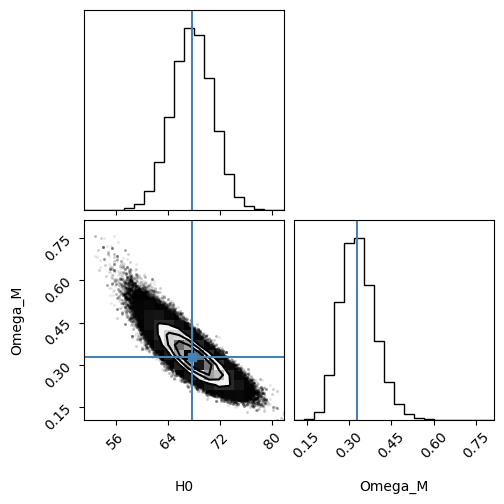

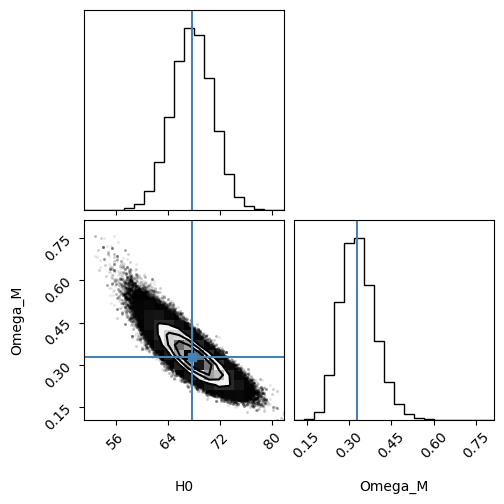

In [2]:
import numpy as np
import emcee
import corner

z_data = z
H_data = Hz
uncertainties = err

def lcdm_model(params, z):
    H0, Omega_M = params
    return H0 * np.sqrt(Omega_M * (1 + z)**3 + (1 - Omega_M))

def chi_squared(params, z_data, H_data, uncertainties):
    model_predictions = lcdm_model(params, z_data)
    chi_sq = np.sum(((H_data - model_predictions) / uncertainties) ** 2)
    return chi_sq

def log_likelihood(params, z_data, H_data, uncertainties):
    chi_sq = chi_squared(params, z_data, H_data, uncertainties)
    return -0.5 * chi_sq

def log_prior(params):
    H0, Omega_M = params
    if 50.0 < H0 < 100.0 and 0.0 < Omega_M < 1.0:
        return 0.0
    return -np.inf

def log_probability(params, z_data, H_data, uncertainties):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, z_data, H_data, uncertainties)

initial_params = [70.0, 0]

n_walkers = 32
n_dim = len(initial_params)
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_probability, args=(z_data, H_data, uncertainties))

n_steps = 20000
sampler.run_mcmc(initial_params + 1e-4 * np.random.randn(n_walkers, n_dim), n_steps, progress=True)

samples = sampler.get_chain(discard=100, flat=True)

percentiles = np.percentile(samples, [16, 50, 84], axis=0)

print("Parameter estimates:")
print("H0: {:.2f} +{:.2f}/-{:.2f}".format(percentiles[1, 0], percentiles[2, 0] - percentiles[1, 0], percentiles[1, 0] - percentiles[0, 0]))
print("Omega_M: {:.2f} +{:.2f}/-{:.2f}".format(percentiles[1, 1], percentiles[2, 1] - percentiles[1, 1], percentiles[1, 1] - percentiles[0, 1]))

labels = ['H0', 'Omega_M']
corner.corner(samples, labels=labels, truths=percentiles[1, :])

In [70]:
def Lcdm_model(Ho, Omega_M,z):
    return Ho * np.sqrt(Omega_M * (1 + z)**3 + (1 - Omega_M))
def E(Ho, Omega_M,z):
    term_e = Omega_M*((1+z)**3) + 1 - Omega_M
    return np.sqrt(term_e)
def DH(Ho,Omega_M,z):
    return c/(Ho*E(Ho,Omega_M,z))
def f(z,Ho,Omega_M):
    return c/(Ho*E(Ho, Omega_M,z))
def DC(Ho,Omega_M,z):
    val,er=quad(f,0,(z), args=(Ho,Omega_M,))
    return val
def DM(Ho,Omega_M,z):
    return DC(Ho,Omega_M,z)
def DV(Ho,Omega_M,z):
    return ((c/Ho)*(DM(Ho,Omega_M,z)**2)*(z/E(Ho,Omega_M,z)))**(1/3)
def DA(Ho,Omega_M,z):
    return DM(Ho,Omega_M,z)/(1+z)
def rs(Ho,Omega_M):
    h = (Ho/100)
    num = np.exp(-72.3 * ((0.0014 * h**2 + 0.0006)**2))
    den = ((0.02225) ** 0.12807) * (((Omega_M - 0.0014) * h**2) ** 0.25351)
    return 55.154*num/den

rs_fid = 147.78
Wb0_hsq = np.array([0.02225,0.02305,0.02229,0.02305])

def fu(Ho,Omega_M,z_bao):
    Ath_bao = np.zeros(11)
    D_m_range = [0,2,4]
    hub_range = [1,3,5]
    D_v_range = [6,8]
    for i in D_m_range:
        k =  z_bao[i]
        Ath_bao[i] = DM(Ho,Omega_M,k)*rs_fid/rs(Ho,Omega_M)
    for i in hub_range:
        k =  z_bao[i]    
        Ath_bao[i] = Ho*E(Ho,Omega_M,k)*rs(Ho,Omega_M)/rs_fid
    for i in D_v_range:
        k =  z_bao[i]
        Ath_bao[i] = DV(Ho,Omega_M,k)*rs_fid/rs(Ho,Omega_M)
    Ath_bao[7] = DA(Ho,Omega_M,z_bao[7])/(rs(Ho,Omega_M))
    Ath_bao[9] = DH(Ho,Omega_M,z_bao[9])/rs(Ho,Omega_M)
    Ath_bao[10] = DM(Ho,Omega_M,z_bao[10])/rs(Ho,Omega_M)
    return Ath_bao

In [71]:
def chi_new(para,z_bao,Aobs_bao,C_mat):
    Ho, Omega_M=para
    Ath_bao = fu(Ho,Omega_M,z_bao)
    p = Ath_bao - Aobs_bao
    C_inv = np.linalg.inv(C_mat)
    t1 = np.matmul(C_inv,p)
    return np.matmul(p.T, t1)
def chi_sq_LCDM_flat(para,z,Hz,err,z_bao,Aobs_bao,C_mat):
    Ho, Omega_M=para
    chi_squared=0
    for i in range(len(z)):
           chi_squared += ((Hz[i] - Lcdm_model(Ho,Omega_M,z[i])) / err[i]) ** 2
    return chi_squared + chi_new(para,z_bao,Aobs_bao,C_mat)

In [72]:
np.random.seed(99)
nll = lambda *args : chi_sq_LCDM_flat(*args)
H0_ini = 70
Wm0_ini = 0.024
initial = np.array([H0_ini,Wm0_ini])

soln = minimize(nll, initial, args=(z,Hz,err,z_bao,Aobs_bao,C_mat),bounds=[(0,np.inf),(0,1)])
H0_opt_LCDM_flat, Wm0_opt_LCDM_flat = soln.x
print(soln)
H0_opt_LCDM_flat, Wm0_opt_LCDM_flat

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 20.678301602121614
        x: [ 6.854e+01  3.135e-01]
      nit: 15
      jac: [ 0.000e+00  3.197e-06]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


(68.53976040526443, 0.31350888748522554)

In [73]:
def log_prior_LCDM_flat(opt):
    Ho, Omega_M = opt
    if 0.1 <= Omega_M <= 0.7 and 50 <= Ho <= 85:
        return 0.0
    return -np.inf
def log_probability_LCDM_flat(opt, z,Hz,err,z_bao,Aobs_bao,C_mat):
    lp = log_prior_LCDM_flat(opt)
    if not np.isfinite(lp):
        return -np.inf
    return lp - 0.5*chi_sq_LCDM_flat(opt,z,Hz,err,z_bao,Aobs_bao,C_mat)
pos = soln.x + 1e-4 * np.random.randn(200, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_LCDM_flat, args = (z,Hz,err,z_bao,Aobs_bao,C_mat))
sampler.run_mcmc(pos, 2000, progress = True)

100%|██████████| 2000/2000 [11:04<00:00,  3.01it/s]


State([[71.21201226  0.34207925]
 [69.3101818   0.31507094]
 [68.74495374  0.32250305]
 [68.50555419  0.30400155]
 [67.95951046  0.31791877]
 [69.21285245  0.30911365]
 [68.84771633  0.29589619]
 [69.09860292  0.32238327]
 [68.04640901  0.32697062]
 [69.25781184  0.31087538]
 [68.97466561  0.33001459]
 [67.75194514  0.35184837]
 [68.15111153  0.30209089]
 [68.42418473  0.30466002]
 [67.92527242  0.2952521 ]
 [67.99940581  0.33548677]
 [68.18335402  0.29653138]
 [68.71977402  0.34783845]
 [69.78193694  0.3218099 ]
 [68.20092709  0.31444874]
 [70.24995232  0.30882623]
 [66.99102362  0.30090584]
 [68.33562958  0.31426345]
 [67.55025557  0.32097837]
 [66.94237671  0.29091459]
 [68.0919041   0.31056746]
 [68.00085275  0.33187234]
 [67.44962693  0.31512642]
 [70.01602483  0.32142181]
 [69.86922496  0.31662022]
 [70.70094329  0.30436935]
 [68.85864314  0.30695472]
 [67.29459214  0.31235867]
 [69.04377484  0.35475522]
 [68.3609679   0.31669688]
 [69.59805854  0.31151307]
 [66.59196841  0.32850

In [74]:
tau_LCDM_flat = sampler.get_autocorr_time()
print(tau_LCDM_flat)

[28.48503374 27.04643867]


(400000, 2)


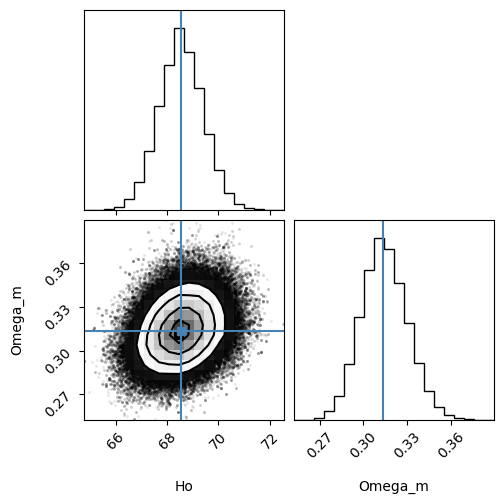

In [75]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)
labels = ["Ho", "Omega_m"]

fig = corner.corner(
    flat_samples, labels=labels, truths=[H0_opt_LCDM_flat, Wm0_opt_LCDM_flat]
);

In [76]:
sampler.reset()
sampler.run_mcmc(pos,20000,progress= True)

100%|██████████| 20000/20000 [1:13:29<00:00,  4.54it/s]  


State([[69.85947659  0.33934649]
 [67.3370392   0.29723821]
 [68.59345764  0.28722417]
 [68.02954104  0.33604467]
 [69.10544831  0.31593302]
 [67.40462437  0.31430169]
 [69.05521278  0.29920138]
 [67.84085211  0.29730891]
 [68.23662423  0.32299432]
 [68.15685219  0.3082816 ]
 [68.09835114  0.30968318]
 [68.14579715  0.29041921]
 [69.46978757  0.29768992]
 [68.55239522  0.28178666]
 [68.68597665  0.29496911]
 [68.56997002  0.31336957]
 [68.67266632  0.2928938 ]
 [68.85461619  0.30111912]
 [68.39390495  0.30702003]
 [68.24188482  0.29677105]
 [67.01061116  0.32349023]
 [68.45028526  0.30611155]
 [68.84023965  0.29847943]
 [66.75437662  0.27658644]
 [68.12060233  0.3027179 ]
 [68.92402166  0.2888218 ]
 [67.56033119  0.30879967]
 [68.67476519  0.34361082]
 [68.20460588  0.32710013]
 [68.66615984  0.31169472]
 [70.58966125  0.33557419]
 [68.56594973  0.32945683]
 [67.66069465  0.33618685]
 [69.16179932  0.31777165]
 [68.76658649  0.32885171]
 [67.64906444  0.30264732]
 [68.27527616  0.31257

In [77]:
tau_LCDM_flat = sampler.get_autocorr_time()
print(tau_LCDM_flat)

[31.77837195 31.63866279]


(4000000, 2)


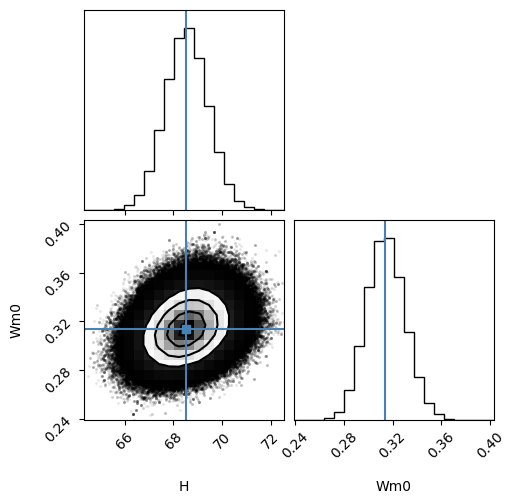

In [78]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)
labels = ["H", "Wm0"]

fig = corner.corner(
    flat_samples, labels=labels, truths=[H0_opt_LCDM_flat, Wm0_opt_LCDM_flat]
);

In [79]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84]) 
    q= np.diff(mcmc) 
    txt = "\mathrm{{{3}}} = {0:3}_{{-{1:.3f}}}^{{{2:.3f}}}" 
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
import getdist
from getdist import plots,MCSamples
import matplotlib.pyplot as plt
names = ["Ho","Omega_M"]
labels = ["H_0","\Omega_{M}"]
samples2 = MCSamples(samples=flat_samples,names = names, labels = labels)
means=samples2.getMeans()
stats=samples2.getMargeStats() 
conf_levels = samples2.contours
print(means)
mcmc

Removed no burn in
[68.54328845  0.31450099]


array([0.2987834 , 0.31413327, 0.33020087])

In [81]:
lims2 = stats.parWithName('Omega_M').limits 
lims1 = stats.parWithName('Ho').limits
for conf, lim1, lim2 in zip(samples2.contours,lims1, lims2):
      if conf != 0.6827:
          continue

      print('value: %.3f, lower: %.3f, upper: %.3f'%(means[0], lim1.lower - means[0], lim1.upper- means[0]))
      print('value: %.2f, lower: %.2f, upper: %.2f'%(means[1], lim2.lower - means[1], lim2.upper - means[1]))

<Figure size 600x450 with 0 Axes>

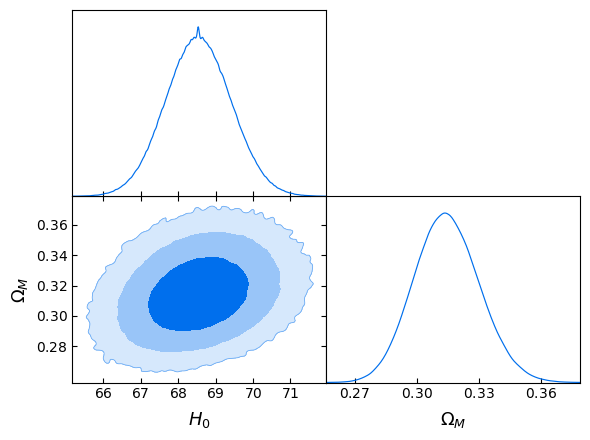

In [82]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.6827, 0.9545, 0.9973]})
g.settings.num_plot_contours = 4
g.triangle_plot([samples2], filled=True);